# Chapter 23 - NeuralProphet

## Listing 23-1. Importing the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('heatwave-pageviews-20150701-20250531.csv')
data

,Date,Heat wave
0,2015-07,26379
1,2015-08,18584
2,2015-09,12529
3,2015-10,15343
4,2015-11,13545
...,...,...
114,2025-01,11067
115,2025-02,11158
116,2025-03,17925
117,2025-04,24095


## Listing 23-2. Plotting the data

<Axes: xlabel='Date'>

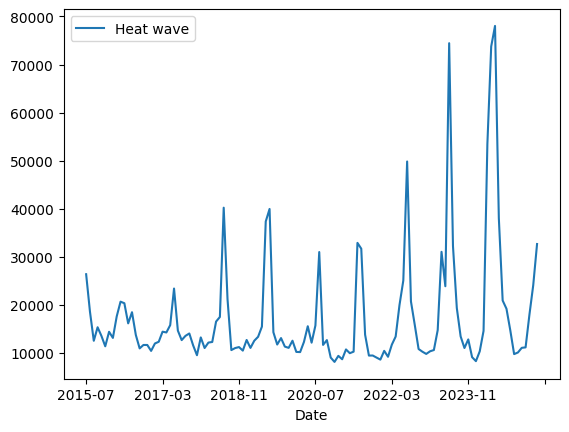

In [2]:
data.set_index('Date').plot()

## Listing 23-3. Prepare the data for NeuralProphet

In [3]:
data = data.rename({
    'Date': 'ds',
    'Heat wave': 'y',
}, axis=1)

data.head()

,ds,y
0,2015-07,26379
1,2015-08,18584
2,2015-09,12529
3,2015-10,15343
4,2015-11,13545


## Listing 23-4. Decomposition

/opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:464: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  if df.groupby("ID").apply(lambda x:

Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (8) is too small than the required number                     for the learning rate finder (208). The results might not be optimal.

WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/pytorch_lightning/utilities/data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 16. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/pytorch_lightning/utilities/data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 7. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


Finding best initial lr: 100%|██████████| 208/208 [00:01<00:00, 115.20it/s]


Training: |          | 0/? [00:15<?, ?it/s, v_num=116, train_loss=0.069, reg_loss=0.000, MAE=5.12e+3, RMSE=8.34e+3, Loss=0.0669, RegLoss=0.000] 


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.16]% of the data.
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as a

Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 68.21it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/plot_forecast_plotly.py:410: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result




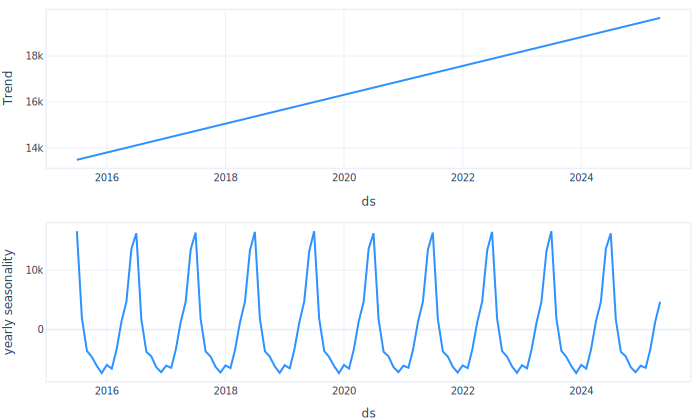

In [4]:
from neuralprophet import NeuralProphet

# Fit a model to be able to inspect decomposition
m = NeuralProphet(    
    # Trend settings: fit one linear trend without changepoints
    growth='linear',
    n_changepoints=0,
    
    # Seasonality settings: fit yearly seasonality
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
)

metrics = m.fit(data)

# We need to build a forecast to be able to inspect decomposition
fcst = m.predict(data)

# Use plot components to inspect decomposition
m.set_plotting_backend("plotly-static")
m.plot_components(fcst)

## Listing 23-5. Advanced Decomposition

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:464: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.16]% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe

Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (8) is too small than the required number                     for the learning rate finder (208). The results might not be optimal.

Finding best initial lr: 100%|██████████| 208/208 [00:02<00:00, 102.10it/s]


Training: |          | 0/? [00:17<?, ?it/s, v_num=117, train_loss=0.0659, reg_loss=0.000, MAE=4.76e+3, RMSE=8.22e+3, Loss=0.0621, RegLoss=0.000]

WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.16]% of the data.
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
WARNING -


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 39.68it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/plot_forecast_plotly.py:410: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result




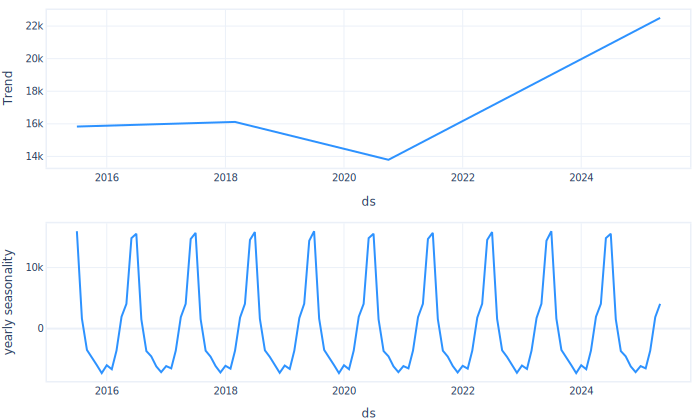

In [5]:
# Fit a model to be able to inspect decomposition
m = NeuralProphet(    
    # Trend settings: fit a linear trend with 2 changepoints
    growth='linear',
    n_changepoints=2,
    
    # Seasonality settings: fit yearly seasonality
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
)

metrics = m.fit(data)

# We need to build a forecast to be able to inspect decomposition
fcst = m.predict(data)

# Use plot components to inspect decomposition
m.set_plotting_backend("plotly-static")
m.plot_components(fcst)

## Listing 23-6. Train test split

<Axes: xlabel='ds'>

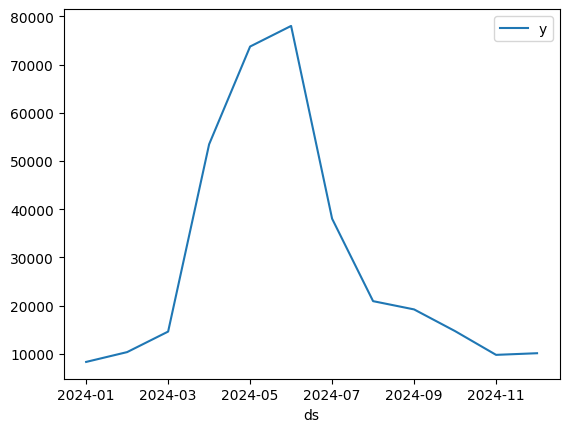

In [6]:
train = data.iloc[:-17]
test = data.iloc[-17:-5]
test.set_index('ds').plot()

## 23-7. Fit the simple NeuralProphet model

In [7]:
# Set seed for reproducibility
from neuralprophet import set_random_seed
set_random_seed(0)

m = NeuralProphet(    
    # Trend settings: fit one linear trend without changepoints
    growth='linear',
    n_changepoints=0,
    
    # Seasonality settings: fit yearly seasonality
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
)

# Fit only on train data
metrics = m.fit(train)

#Forecast on test data
fcst = m.predict(test)

fcst

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:464: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.02]% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe

Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (7) is too small than the required number                     for the learning rate finder (207). The results might not be optimal.

ding best initial lr:   0%|          | 0/207 [00:00<?, ?it/s]
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/pytorch_lightning/utilities/data.py:79: UserWarning:

Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 6. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.



Finding best initial lr: 100%|██████████| 207/207 [00:01<00:00, 113.70it/s]


Training: |          | 0/? [00:14<?, ?it/s, v_num=118, train_loss=0.061, reg_loss=0.000, MAE=3.64e+3, RMSE=5.89e+3, Loss=0.0576, RegLoss=0.000] 

WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [91.667]% of the data.
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
WARNING 

WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:464: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.




Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 60.77it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


,ds,y,yhat1,trend,season_yearly
0,2024-01-01,8292,12674.435547,16429.958984,-3755.523193
1,2024-02-01,10330,11060.708008,16446.187500,-5385.480469
2,2024-03-01,14590,13283.302734,16461.371094,-3178.068115
3,2024-04-01,53466,16168.674805,16477.599609,-308.924316
4,2024-05-01,73760,17860.632812,16493.304688,1367.327026
5,2024-06-01,78038,28227.638672,16509.535156,11718.105469
6,2024-07-01,38028,32455.425781,16525.242188,15930.184570
7,2024-08-01,20907,19307.664062,16541.468750,2766.193359
8,2024-09-01,19192,12812.809570,16557.699219,-3744.889648
9,2024-10-01,14689,13074.042969,16573.404297,-3499.360840


## Listing 23-8. Evaluate the NeuralProphet forecast

0.6925587058067322


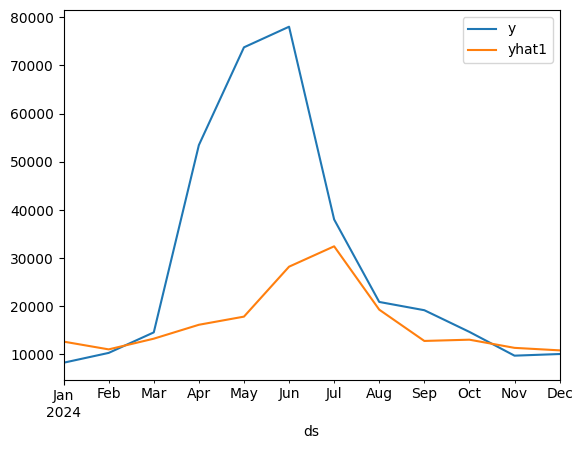

In [8]:
# Compute 1-MAPE performance indicator
from sklearn.metrics import mean_absolute_percentage_error
perf=1-mean_absolute_percentage_error(fcst['y'], fcst['yhat1'])
print(perf)

# Plot the forecast against the test data
fcst.set_index('ds')['y'].plot()
fcst.set_index('ds')['yhat1'].plot()
plt.legend(['y', 'yhat1'])

## Listing 23-9. Tune the NeuralProphet forecast

In [10]:
def fit_evaluate_neuralprophet(growth, n_changepoints, seasonality_mode, n_lags, newer_samples_weight):
    m = NeuralProphet(    
        growth=growth,
        n_changepoints=n_changepoints,
        yearly_seasonality=True,
        weekly_seasonality=False,
        daily_seasonality=False,
        seasonality_mode=seasonality_mode,
        n_lags=n_lags,
        loss_func='MAE',
        newer_samples_weight=newer_samples_weight,
        newer_samples_start=0.88,
        trainer_config={'logger': None}
    )
    
    metrics = m.fit(train)

    fcst = m.predict(test)
    mape = 1-mean_absolute_percentage_error(fcst['y'].iloc[2:], fcst['yhat1'].iloc[2:])
    
    return mape

results = []
for growth in ['linear', 'discontinuous']:
    for n_changepoints in [5, 10, 20]:
        for n_lags in [1, 2]:
            for seasonality_mode in ['additive', 'multiplicative']:
                for newer_samples_weight in [10, 20]:
                    mape = fit_evaluate_neuralprophet(growth, n_changepoints, seasonality_mode, n_lags, newer_samples_weight)
                    result = [growth, n_changepoints, seasonality_mode, n_lags, newer_samples_weight, mape]
                    print(result)
                    results.append(result)

results = pd.DataFrame(results, columns=['growth', 'n_changepoints', 'seasonality_mode', 'n_lags', 'newer_samples_weight', 'mape'])
results.sort_values('mape', ascending=False)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:464: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.02]% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe

Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (7) is too small than the required number                     for the learning rate finder (207). The results might not be optimal.

Finding best initial lr: 100%|██████████| 207/207 [00:02<00:00, 94.98it/s]


Training: |          | 0/? [00:18<?, ?it/s, v_num=167, train_loss=0.0231, reg_loss=0.000, MAE=3.41e+3, RMSE=6.34e+3, Loss=0.0216, RegLoss=0.000]

WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [91.667]% of the data.
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
WARNING 


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 198.49it/s]


INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:464: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS cor

['linear', 5, 'additive', 1, 10, 0.730123370885849]
Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (7) is too small than the required number                     for the learning rate finder (207). The results might not be optimal.

Finding best initial lr: 100%|██████████| 207/207 [00:02<00:00, 96.77it/s]


Training: |          | 0/? [00:18<?, ?it/s, v_num=168, train_loss=0.0138, reg_loss=0.000, MAE=5.61e+3, RMSE=1.17e+4, Loss=0.0127, RegLoss=0.000]

WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [91.667]% of the data.
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
WARNING 


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 186.04it/s]


INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:464: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS cor

['linear', 5, 'additive', 1, 20, 0.7560107260942459]
Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (7) is too small than the required number                     for the learning rate finder (207). The results might not be optimal.

Finding best initial lr: 100%|██████████| 207/207 [00:02<00:00, 91.56it/s]


Training: |          | 0/? [00:18<?, ?it/s, v_num=169, train_loss=0.019, reg_loss=0.000, MAE=4.12e+3, RMSE=8.13e+3, Loss=0.0199, RegLoss=0.000] 

WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [91.667]% of the data.
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
WARNING 


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 212.94it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:464: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS cor


['linear', 5, 'multiplicative', 1, 10, 0.744113564491272]
Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (7) is too small than the required number                     for the learning rate finder (207). The results might not be optimal.

Finding best initial lr: 100%|██████████| 207/207 [00:02<00:00, 95.19it/s]


Training: |          | 0/? [00:18<?, ?it/s, v_num=170, train_loss=0.00926, reg_loss=0.000, MAE=4.1e+3, RMSE=8.19e+3, Loss=0.00864, RegLoss=0.000] 

WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [91.667]% of the data.
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
WARNING 


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 190.08it/s]


INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:464: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS cor

['linear', 5, 'multiplicative', 1, 20, 0.7299663424491882]
Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (7) is too small than the required number                     for the learning rate finder (207). The results might not be optimal.

Finding best initial lr: 100%|██████████| 207/207 [00:02<00:00, 97.03it/s]


Training: |          | 0/? [00:18<?, ?it/s, v_num=171, train_loss=0.0241, reg_loss=0.000, MAE=3.78e+3, RMSE=6.75e+3, Loss=0.0226, RegLoss=0.000]

WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [91.667]% of the data.
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
WARNING 


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 229.36it/s]


INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:464: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS cor

['linear', 5, 'additive', 2, 10, 0.7305112481117249]
Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (7) is too small than the required number                     for the learning rate finder (207). The results might not be optimal.

Finding best initial lr: 100%|██████████| 207/207 [00:02<00:00, 92.63it/s]


Training: |          | 0/? [00:18<?, ?it/s, v_num=172, train_loss=0.0138, reg_loss=0.000, MAE=5.64e+3, RMSE=1.14e+4, Loss=0.0129, RegLoss=0.000]

WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [91.667]% of the data.
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
WARNING 


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 201.17it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:464: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS cor


['linear', 5, 'additive', 2, 20, 0.7526369988918304]
Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (7) is too small than the required number                     for the learning rate finder (207). The results might not be optimal.

Finding best initial lr: 100%|██████████| 207/207 [00:02<00:00, 95.39it/s]


Training: |          | 0/? [00:18<?, ?it/s, v_num=173, train_loss=0.0211, reg_loss=0.000, MAE=3.89e+3, RMSE=7.84e+3, Loss=0.021, RegLoss=0.000] 

WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [91.667]% of the data.
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
WARNING 


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 200.49it/s]


INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:464: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS cor

['linear', 5, 'multiplicative', 2, 10, 0.7581358402967453]
Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (7) is too small than the required number                     for the learning rate finder (207). The results might not be optimal.

Finding best initial lr: 100%|██████████| 207/207 [00:02<00:00, 96.06it/s]


Training: |          | 0/? [00:18<?, ?it/s, v_num=174, train_loss=0.00999, reg_loss=0.000, MAE=5.54e+3, RMSE=1.06e+4, Loss=0.012, RegLoss=0.000]  

WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [91.667]% of the data.
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
WARNING 


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 188.03it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:464: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS cor


['linear', 5, 'multiplicative', 2, 20, 0.7227372527122498]
Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (7) is too small than the required number                     for the learning rate finder (207). The results might not be optimal.

Finding best initial lr: 100%|██████████| 207/207 [00:02<00:00, 97.12it/s]


Training: |          | 0/? [00:18<?, ?it/s, v_num=175, train_loss=0.0226, reg_loss=0.000, MAE=3.36e+3, RMSE=5.99e+3, Loss=0.021, RegLoss=0.000] 

WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [91.667]% of the data.
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
WARNING 


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 188.78it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:464: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS cor


['linear', 10, 'additive', 1, 10, 0.7373634576797485]
Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (7) is too small than the required number                     for the learning rate finder (207). The results might not be optimal.

Finding best initial lr: 100%|██████████| 207/207 [00:02<00:00, 95.69it/s]


Training: |          | 0/? [00:18<?, ?it/s, v_num=176, train_loss=0.0134, reg_loss=0.000, MAE=6.43e+3, RMSE=1.32e+4, Loss=0.0142, RegLoss=0.000]

WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [91.667]% of the data.
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
WARNING 


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 200.80it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:464: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS cor


['linear', 10, 'additive', 1, 20, 0.7632271349430084]
Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (7) is too small than the required number                     for the learning rate finder (207). The results might not be optimal.

Finding best initial lr: 100%|██████████| 207/207 [00:02<00:00, 94.95it/s]


Training: |          | 0/? [00:18<?, ?it/s, v_num=177, train_loss=0.0222, reg_loss=0.000, MAE=3.42e+3, RMSE=6018.5, Loss=0.0205, RegLoss=0.000] 

WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [91.667]% of the data.
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
WARNING 


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 195.27it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:464: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS cor


['linear', 10, 'multiplicative', 1, 10, 0.7267916202545166]
Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (7) is too small than the required number                     for the learning rate finder (207). The results might not be optimal.

Finding best initial lr: 100%|██████████| 207/207 [00:02<00:00, 95.41it/s]


Training: |          | 0/? [00:18<?, ?it/s, v_num=178, train_loss=0.0111, reg_loss=0.000, MAE=4.76e+3, RMSE=8.42e+3, Loss=0.0115, RegLoss=0.000]

WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [91.667]% of the data.
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
WARNING 


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 216.96it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:464: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS cor


['linear', 10, 'multiplicative', 1, 20, 0.7619042843580246]
Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (7) is too small than the required number                     for the learning rate finder (207). The results might not be optimal.

Finding best initial lr: 100%|██████████| 207/207 [00:02<00:00, 96.54it/s]


Training: |          | 0/? [00:18<?, ?it/s, v_num=179, train_loss=0.0229, reg_loss=0.000, MAE=3.31e+3, RMSE=5.98e+3, Loss=0.0207, RegLoss=0.000]

WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [91.667]% of the data.
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
WARNING 


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 214.70it/s]


INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:464: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS cor

['linear', 10, 'additive', 2, 10, 0.7410464882850647]
Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (7) is too small than the required number                     for the learning rate finder (207). The results might not be optimal.

Finding best initial lr: 100%|██████████| 207/207 [00:02<00:00, 96.59it/s]


Training: |          | 0/? [00:18<?, ?it/s, v_num=180, train_loss=0.0133, reg_loss=0.000, MAE=5.35e+3, RMSE=1.04e+4, Loss=0.0122, RegLoss=0.000]

WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [91.667]% of the data.
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
WARNING 


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 174.10it/s]


INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:464: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS cor

['linear', 10, 'additive', 2, 20, 0.7687056958675385]
Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (7) is too small than the required number                     for the learning rate finder (207). The results might not be optimal.

Finding best initial lr: 100%|██████████| 207/207 [00:02<00:00, 95.39it/s]


Training: |          | 0/? [00:18<?, ?it/s, v_num=181, train_loss=0.0232, reg_loss=0.000, MAE=4.88e+3, RMSE=7.65e+3, Loss=0.0426, RegLoss=0.000]

WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [91.667]% of the data.
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
WARNING 


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 167.16it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:464: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS cor


['linear', 10, 'multiplicative', 2, 10, 0.704225093126297]
Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (7) is too small than the required number                     for the learning rate finder (207). The results might not be optimal.

Finding best initial lr: 100%|██████████| 207/207 [00:02<00:00, 95.01it/s]


Training: |          | 0/? [00:18<?, ?it/s, v_num=182, train_loss=0.112, reg_loss=0.000, MAE=1.49e+4, RMSE=2.16e+4, Loss=0.125, RegLoss=0.000]

WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [91.667]% of the data.
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
WARNING 


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 197.31it/s]


INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:464: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS cor

['linear', 10, 'multiplicative', 2, 20, -1.0009288787841797]
Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (7) is too small than the required number                     for the learning rate finder (207). The results might not be optimal.

Finding best initial lr: 100%|██████████| 207/207 [00:02<00:00, 96.15it/s]


Training: |          | 0/? [00:19<?, ?it/s, v_num=183, train_loss=0.0227, reg_loss=0.000, MAE=3.3e+3, RMSE=6.29e+3, Loss=0.0214, RegLoss=0.000] 

WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [91.667]% of the data.
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
WARNING 


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 214.83it/s]


INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:464: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS cor

['linear', 20, 'additive', 1, 10, 0.7378563284873962]
Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (7) is too small than the required number                     for the learning rate finder (207). The results might not be optimal.

Finding best initial lr: 100%|██████████| 207/207 [00:02<00:00, 94.29it/s]


Training: |          | 0/? [00:18<?, ?it/s, v_num=184, train_loss=0.0133, reg_loss=0.000, MAE=7.15e+3, RMSE=1.21e+4, Loss=0.0157, RegLoss=0.000]

WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [91.667]% of the data.
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
WARNING 


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 205.86it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:464: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS cor


['linear', 20, 'additive', 1, 20, 0.7621015012264252]
Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (7) is too small than the required number                     for the learning rate finder (207). The results might not be optimal.

Finding best initial lr: 100%|██████████| 207/207 [00:02<00:00, 93.97it/s]


Training: |          | 0/? [00:18<?, ?it/s, v_num=185, train_loss=0.0183, reg_loss=0.000, MAE=3.94e+3, RMSE=7.91e+3, Loss=0.0173, RegLoss=0.000]

WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [91.667]% of the data.
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
WARNING 


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 203.37it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:464: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS cor


['linear', 20, 'multiplicative', 1, 10, 0.7207258343696594]
Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (7) is too small than the required number                     for the learning rate finder (207). The results might not be optimal.

Finding best initial lr: 100%|██████████| 207/207 [00:02<00:00, 90.59it/s]


Training: |          | 0/? [00:19<?, ?it/s, v_num=186, train_loss=0.00989, reg_loss=0.000, MAE=4.73e+3, RMSE=8.63e+3, Loss=0.0097, RegLoss=0.000] 

WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [91.667]% of the data.
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
WARNING 


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 216.08it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:464: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS cor


['linear', 20, 'multiplicative', 1, 20, 0.7342060208320618]
Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (7) is too small than the required number                     for the learning rate finder (207). The results might not be optimal.

Finding best initial lr: 100%|██████████| 207/207 [00:02<00:00, 96.46it/s]


Training: |          | 0/? [00:18<?, ?it/s, v_num=187, train_loss=0.0226, reg_loss=0.000, MAE=3.54e+3, RMSE=7.17e+3, Loss=0.0212, RegLoss=0.000]

WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [91.667]% of the data.
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
WARNING 


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 216.45it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:464: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS cor


['linear', 20, 'additive', 2, 10, 0.7478975355625153]
Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (7) is too small than the required number                     for the learning rate finder (207). The results might not be optimal.

Finding best initial lr: 100%|██████████| 207/207 [00:02<00:00, 93.46it/s]


Training: |          | 0/? [00:18<?, ?it/s, v_num=188, train_loss=0.178, reg_loss=0.000, MAE=2.93e+4, RMSE=3.54e+4, Loss=0.165, RegLoss=0.000]

WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [91.667]% of the data.
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
WARNING 


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 193.50it/s]


INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:464: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS cor

['linear', 20, 'additive', 2, 20, -1.1810619831085205]
Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (7) is too small than the required number                     for the learning rate finder (207). The results might not be optimal.

Finding best initial lr: 100%|██████████| 207/207 [00:02<00:00, 95.72it/s]


Training: |          | 0/? [00:19<?, ?it/s, v_num=189, train_loss=0.0186, reg_loss=0.000, MAE=6.32e+3, RMSE=1.05e+4, Loss=0.0272, RegLoss=0.000]

WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [91.667]% of the data.
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
WARNING 


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 218.06it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:464: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS cor


['linear', 20, 'multiplicative', 2, 10, 0.7392319738864899]
Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (7) is too small than the required number                     for the learning rate finder (207). The results might not be optimal.

Finding best initial lr: 100%|██████████| 207/207 [00:02<00:00, 96.10it/s]


Training: |          | 0/? [00:18<?, ?it/s, v_num=190, train_loss=0.0105, reg_loss=0.000, MAE=4.85e+3, RMSE=9.32e+3, Loss=0.0099, RegLoss=0.000] 

WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [91.667]% of the data.
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
WARNING 


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 222.66it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:464: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS cor


['linear', 20, 'multiplicative', 2, 20, 0.7343780994415283]
Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (7) is too small than the required number                     for the learning rate finder (207). The results might not be optimal.

Finding best initial lr: 100%|██████████| 207/207 [00:02<00:00, 93.91it/s]


Training: |          | 0/? [00:18<?, ?it/s, v_num=191, train_loss=0.023, reg_loss=0.000, MAE=3.77e+3, RMSE=7.24e+3, Loss=0.0227, RegLoss=0.000] 

WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [91.667]% of the data.
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
WARNING 


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 210.04it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:464: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS cor


['discontinuous', 5, 'additive', 1, 10, 0.7286450862884521]
Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (7) is too small than the required number                     for the learning rate finder (207). The results might not be optimal.

Finding best initial lr: 100%|██████████| 207/207 [00:02<00:00, 98.16it/s]


Training: |          | 0/? [00:18<?, ?it/s, v_num=192, train_loss=0.0132, reg_loss=0.000, MAE=5.85e+3, RMSE=1.27e+4, Loss=0.0128, RegLoss=0.000]

WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [91.667]% of the data.
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
WARNING 


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 232.50it/s]


INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:464: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS cor

['discontinuous', 5, 'additive', 1, 20, 0.7522170841693878]
Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (7) is too small than the required number                     for the learning rate finder (207). The results might not be optimal.

Finding best initial lr: 100%|██████████| 207/207 [00:02<00:00, 97.27it/s]


Training: |          | 0/? [00:18<?, ?it/s, v_num=193, train_loss=0.0202, reg_loss=0.000, MAE=4.59e+3, RMSE=7.8e+3, Loss=0.0226, RegLoss=0.000] 

WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [91.667]% of the data.
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
WARNING 


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 221.97it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:464: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS cor


['discontinuous', 5, 'multiplicative', 1, 10, 0.7306006848812103]
Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (7) is too small than the required number                     for the learning rate finder (207). The results might not be optimal.

Finding best initial lr: 100%|██████████| 207/207 [00:02<00:00, 95.63it/s]


Training: |          | 0/? [00:18<?, ?it/s, v_num=194, train_loss=0.0107, reg_loss=0.000, MAE=5.63e+3, RMSE=1.09e+4, Loss=0.0116, RegLoss=0.000] 

WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [91.667]% of the data.
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
WARNING 


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 192.16it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:464: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS cor


['discontinuous', 5, 'multiplicative', 1, 20, 0.7325202822685242]
Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (7) is too small than the required number                     for the learning rate finder (207). The results might not be optimal.

Finding best initial lr: 100%|██████████| 207/207 [00:02<00:00, 97.01it/s]


Training: |          | 0/? [00:18<?, ?it/s, v_num=195, train_loss=0.0224, reg_loss=0.000, MAE=3.19e+3, RMSE=6.14e+3, Loss=0.0202, RegLoss=0.000]

WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [91.667]% of the data.
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
WARNING 


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 216.78it/s]


INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:464: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS cor

['discontinuous', 5, 'additive', 2, 10, 0.732686460018158]
Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (7) is too small than the required number                     for the learning rate finder (207). The results might not be optimal.

Finding best initial lr: 100%|██████████| 207/207 [00:02<00:00, 97.52it/s]


Training: |          | 0/? [00:18<?, ?it/s, v_num=196, train_loss=0.0135, reg_loss=0.000, MAE=5.45e+3, RMSE=1.06e+4, Loss=0.0121, RegLoss=0.000]

WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [91.667]% of the data.
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
WARNING 


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 216.17it/s]


INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:464: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS cor

['discontinuous', 5, 'additive', 2, 20, 0.7579642236232758]
Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (7) is too small than the required number                     for the learning rate finder (207). The results might not be optimal.

Finding best initial lr: 100%|██████████| 207/207 [00:02<00:00, 93.33it/s]


Training: |          | 0/? [00:19<?, ?it/s, v_num=197, train_loss=0.0214, reg_loss=0.000, MAE=4.22e+3, RMSE=8.32e+3, Loss=0.0334, RegLoss=0.000]

WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [91.667]% of the data.
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
WARNING 


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 226.55it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:464: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS cor


['discontinuous', 5, 'multiplicative', 2, 10, 0.7623568475246429]
Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (7) is too small than the required number                     for the learning rate finder (207). The results might not be optimal.

Finding best initial lr: 100%|██████████| 207/207 [00:02<00:00, 96.20it/s]


Training: |          | 0/? [00:18<?, ?it/s, v_num=198, train_loss=0.0947, reg_loss=0.000, MAE=1.36e+4, RMSE=1.83e+4, Loss=0.086, RegLoss=0.000] 

WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [91.667]% of the data.
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
WARNING 


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 219.97it/s]


INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:464: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS cor

['discontinuous', 5, 'multiplicative', 2, 20, -0.5601630210876465]
Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (7) is too small than the required number                     for the learning rate finder (207). The results might not be optimal.

Finding best initial lr: 100%|██████████| 207/207 [00:02<00:00, 97.51it/s]


Training: |          | 0/? [00:18<?, ?it/s, v_num=199, train_loss=0.0224, reg_loss=0.000, MAE=3.51e+3, RMSE=6.87e+3, Loss=0.0214, RegLoss=0.000]

WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [91.667]% of the data.
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
WARNING 


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 209.42it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:464: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS cor


['discontinuous', 10, 'additive', 1, 10, 0.7256544530391693]
Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (7) is too small than the required number                     for the learning rate finder (207). The results might not be optimal.

Finding best initial lr: 100%|██████████| 207/207 [00:02<00:00, 96.28it/s]


Training: |          | 0/? [00:18<?, ?it/s, v_num=200, train_loss=0.019, reg_loss=0.000, MAE=8.46e+3, RMSE=1.62e+4, Loss=0.0186, RegLoss=0.000] 

WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [91.667]% of the data.
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
WARNING 


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 185.94it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:464: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS cor


['discontinuous', 10, 'additive', 1, 20, 0.638975977897644]
Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (7) is too small than the required number                     for the learning rate finder (207). The results might not be optimal.

Finding best initial lr: 100%|██████████| 207/207 [00:02<00:00, 94.77it/s]


Training: |          | 0/? [00:18<?, ?it/s, v_num=201, train_loss=0.0308, reg_loss=0.000, MAE=3.51e+3, RMSE=7.32e+3, Loss=0.0285, RegLoss=0.000]

WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [91.667]% of the data.
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
WARNING 


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 233.55it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:464: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS cor


['discontinuous', 10, 'multiplicative', 1, 10, 0.6691039502620697]
Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (7) is too small than the required number                     for the learning rate finder (207). The results might not be optimal.

Finding best initial lr: 100%|██████████| 207/207 [00:02<00:00, 96.36it/s]


Training: |          | 0/? [00:18<?, ?it/s, v_num=202, train_loss=0.00906, reg_loss=0.000, MAE=4.43e+3, RMSE=9.04e+3, Loss=0.00916, RegLoss=0.000]

WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [91.667]% of the data.
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
WARNING 


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 199.09it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:464: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS cor


['discontinuous', 10, 'multiplicative', 1, 20, 0.7768449038267136]
Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (7) is too small than the required number                     for the learning rate finder (207). The results might not be optimal.

Finding best initial lr: 100%|██████████| 207/207 [00:02<00:00, 94.21it/s]


Training: |          | 0/? [00:18<?, ?it/s, v_num=203, train_loss=0.0225, reg_loss=0.000, MAE=3.43e+3, RMSE=6.48e+3, Loss=0.021, RegLoss=0.000] 

WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [91.667]% of the data.
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
WARNING 


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 187.76it/s]


INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:464: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS cor

['discontinuous', 10, 'additive', 2, 10, 0.7306744754314423]
Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (7) is too small than the required number                     for the learning rate finder (207). The results might not be optimal.

Finding best initial lr: 100%|██████████| 207/207 [00:02<00:00, 94.37it/s]


Training: |          | 0/? [00:18<?, ?it/s, v_num=204, train_loss=0.013, reg_loss=0.000, MAE=5.31e+3, RMSE=1.04e+4, Loss=0.0118, RegLoss=0.000] 

WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [91.667]% of the data.
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
WARNING 


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 214.22it/s]


INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:464: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS cor

['discontinuous', 10, 'additive', 2, 20, 0.7509420216083527]
Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (7) is too small than the required number                     for the learning rate finder (207). The results might not be optimal.

Finding best initial lr: 100%|██████████| 207/207 [00:02<00:00, 97.31it/s]


Training: |          | 0/? [00:18<?, ?it/s, v_num=205, train_loss=0.0171, reg_loss=0.000, MAE=4.53e+3, RMSE=7.92e+3, Loss=0.019, RegLoss=0.000] 

WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [91.667]% of the data.
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
WARNING 


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 240.90it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:464: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS cor


['discontinuous', 10, 'multiplicative', 2, 10, 0.7633065730333328]
Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (7) is too small than the required number                     for the learning rate finder (207). The results might not be optimal.

Finding best initial lr: 100%|██████████| 207/207 [00:02<00:00, 96.61it/s]


Training: |          | 0/? [00:18<?, ?it/s, v_num=206, train_loss=0.00825, reg_loss=0.000, MAE=4.6e+3, RMSE=8.4e+3, Loss=0.0094, RegLoss=0.000]   

WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [91.667]% of the data.
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
WARNING 


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 209.46it/s]


INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:464: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS cor

['discontinuous', 10, 'multiplicative', 2, 20, 0.7544851750135422]
Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (7) is too small than the required number                     for the learning rate finder (207). The results might not be optimal.

Finding best initial lr: 100%|██████████| 207/207 [00:02<00:00, 97.44it/s]


Training: |          | 0/? [00:18<?, ?it/s, v_num=207, train_loss=0.0217, reg_loss=0.000, MAE=3.86e+3, RMSE=7.41e+3, Loss=0.0225, RegLoss=0.000]

WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [91.667]% of the data.
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
WARNING 


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 214.87it/s]


INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:464: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS cor

['discontinuous', 20, 'additive', 1, 10, 0.7214741110801697]
Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (7) is too small than the required number                     for the learning rate finder (207). The results might not be optimal.

Finding best initial lr: 100%|██████████| 207/207 [00:02<00:00, 97.57it/s]


Training: |          | 0/? [00:18<?, ?it/s, v_num=208, train_loss=0.0124, reg_loss=0.000, MAE=5.25e+3, RMSE=1.1e+4, Loss=0.0114, RegLoss=0.000] 

WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [91.667]% of the data.
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
WARNING 


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 237.37it/s]


INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:464: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS cor

['discontinuous', 20, 'additive', 1, 20, 0.7586452066898346]
Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (7) is too small than the required number                     for the learning rate finder (207). The results might not be optimal.

Finding best initial lr: 100%|██████████| 207/207 [00:02<00:00, 95.30it/s]


Training: |          | 0/? [00:18<?, ?it/s, v_num=209, train_loss=0.0154, reg_loss=0.000, MAE=3.63e+3, RMSE=7.82e+3, Loss=0.0153, RegLoss=0.000]

WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [91.667]% of the data.
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
WARNING 


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 192.79it/s]


INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:464: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS cor

['discontinuous', 20, 'multiplicative', 1, 10, 0.741902619600296]
Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (7) is too small than the required number                     for the learning rate finder (207). The results might not be optimal.

Finding best initial lr: 100%|██████████| 207/207 [00:02<00:00, 96.13it/s]


Training: |          | 0/? [00:18<?, ?it/s, v_num=210, train_loss=0.00847, reg_loss=0.000, MAE=3.9e+3, RMSE=7.78e+3, Loss=0.00807, RegLoss=0.000] 

WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [91.667]% of the data.
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
WARNING 


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 225.38it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:464: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS cor


['discontinuous', 20, 'multiplicative', 1, 20, 0.7583605349063873]
Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (7) is too small than the required number                     for the learning rate finder (207). The results might not be optimal.

Finding best initial lr: 100%|██████████| 207/207 [00:02<00:00, 97.44it/s]


Training: |          | 0/? [00:18<?, ?it/s, v_num=211, train_loss=0.0218, reg_loss=0.000, MAE=3.77e+3, RMSE=7.6e+3, Loss=0.0219, RegLoss=0.000] 

WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [91.667]% of the data.
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
WARNING 


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 188.09it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:464: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS cor


['discontinuous', 20, 'additive', 2, 10, 0.7390005886554718]
Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (7) is too small than the required number                     for the learning rate finder (207). The results might not be optimal.

Finding best initial lr: 100%|██████████| 207/207 [00:02<00:00, 95.55it/s]


Training: |          | 0/? [00:18<?, ?it/s, v_num=212, train_loss=0.145, reg_loss=0.000, MAE=2.65e+4, RMSE=3.45e+4, Loss=0.142, RegLoss=0.000]

WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [91.667]% of the data.
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
WARNING 


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 226.80it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:464: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS cor


['discontinuous', 20, 'additive', 2, 20, -1.1304841041564941]
Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (7) is too small than the required number                     for the learning rate finder (207). The results might not be optimal.

Finding best initial lr: 100%|██████████| 207/207 [00:02<00:00, 96.58it/s]


Training: |          | 0/? [00:18<?, ?it/s, v_num=213, train_loss=0.0182, reg_loss=0.000, MAE=3.38e+3, RMSE=6.4e+3, Loss=0.017, RegLoss=0.000]  

WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [91.667]% of the data.
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
WARNING 


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 223.95it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:464: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS cor


['discontinuous', 20, 'multiplicative', 2, 10, 0.744065910577774]
Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (7) is too small than the required number                     for the learning rate finder (207). The results might not be optimal.

Finding best initial lr: 100%|██████████| 207/207 [00:02<00:00, 93.45it/s]


Training: |          | 0/? [00:18<?, ?it/s, v_num=214, train_loss=0.00929, reg_loss=0.000, MAE=4.02e+3, RMSE=7.04e+3, Loss=0.00831, RegLoss=0.000]

WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [91.667]% of the data.
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
WARNING 


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 220.71it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column



['discontinuous', 20, 'multiplicative', 2, 20, 0.7726278603076935]


,growth,n_changepoints,seasonality_mode,n_lags,newer_samples_weight,mape
35,discontinuous,10,multiplicative,1,20,0.776845
47,discontinuous,20,multiplicative,2,20,0.772628
13,linear,10,additive,2,20,0.768706
38,discontinuous,10,multiplicative,2,10,0.763307
9,linear,10,additive,1,20,0.763227
30,discontinuous,5,multiplicative,2,10,0.762357
17,linear,20,additive,1,20,0.762102
11,linear,10,multiplicative,1,20,0.761904
41,discontinuous,20,additive,1,20,0.758645
43,discontinuous,20,multiplicative,1,20,0.758361


## Listing 23-10. The best model

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:464: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.02]% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe

Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (7) is too small than the required number                     for the learning rate finder (207). The results might not be optimal.

Finding best initial lr: 100%|██████████| 207/207 [00:02<00:00, 86.29it/s]


Training: |          | 0/? [00:19<?, ?it/s, v_num=216, train_loss=0.00857, reg_loss=0.000, MAE=4.47e+3, RMSE=8.13e+3, Loss=0.00942, RegLoss=0.000]

WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [91.667]% of the data.
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
WARNING 


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 186.74it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column



0.7523883283138275


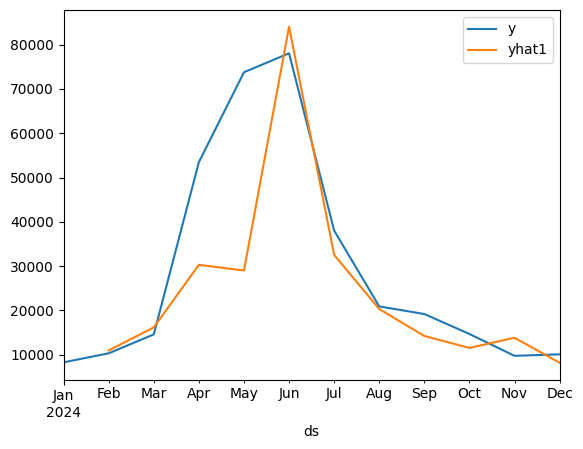

In [12]:
growth='discontinuous'
n_changepoints=10
seasonality_mode = 'multiplicative'
n_lags=1
newer_samples_weight=20

m = NeuralProphet(    
    growth=growth,
    n_changepoints=n_changepoints,
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    seasonality_mode=seasonality_mode,
    n_lags=n_lags,
    loss_func='MAE',
    newer_samples_weight=newer_samples_weight,
    newer_samples_start=0.88,
    trainer_config={'logger': None}
)

metrics = m.fit(train)

fcst = m.predict(test)

mape = 1-mean_absolute_percentage_error(fcst['y'].iloc[2:], fcst['yhat1'].iloc[2:])
print(mape)

# Plot the forecast against the test data
fcst.set_index('ds')['y'].plot()
fcst.set_index('ds')['yhat1'].plot()
plt.legend(['y', 'yhat1'])

## Listing 23-11. Save the model using MLFlow

In [17]:
from neuralprophet import save
import mlflow

with mlflow.start_run() as run:

        # Save the tuned parameters to mlflow
        params = {
            'growth':'discontinuous',
            'n_changepoints':10,
            'seasonality_mode':'mutiplicative',
            'n_lags':1,
            'newer_samples_weight':20
        }
        mlflow.log_params(params)

        # Fit the model
        growth='discontinuous'
        n_changepoints=10
        seasonality_mode='multiplicative'
        n_lags=1
        newer_samples_weight=20

        
        m = NeuralProphet(    
            growth=growth,
            n_changepoints=n_changepoints,
            yearly_seasonality=True,
            weekly_seasonality=False,
            daily_seasonality=False,
            seasonality_mode=seasonality_mode,
            n_lags=n_lags,
            loss_func='MAE',
            newer_samples_weight=newer_samples_weight,
            newer_samples_start=0.88,
            trainer_config={'logger': None}
        )
        
        metrics = m.fit(train)
        fcst = m.predict(test)
        mape = 1-mean_absolute_percentage_error(fcst['y'].iloc[2:], fcst['yhat1'].iloc[2:])
        

        # Save the test MAPE
        mlflow.log_metric("MAPE_test", value=mape)

        # Save the model
        model_path = "tuned-neuralprophet.np"
        save(m, model_path)

        # Log the model in MLflow
        mlflow.log_artifact(model_path, "tuned-neuralprophet")

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:464: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [99.02]% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe

Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (7) is too small than the required number                     for the learning rate finder (207). The results might not be optimal.

Finding best initial lr: 100%|██████████| 207/207 [00:03<00:00, 65.40it/s]


Training: |          | 0/? [00:26<?, ?it/s, v_num=218, train_loss=0.00902, reg_loss=0.000, MAE=4.74e+3, RMSE=8.94e+3, Loss=0.00969, RegLoss=0.000]

WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [91.667]% of the data.
WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /opt/anaconda3/envs/chapter23/lib/python3.9/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
WARNING 


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 164.63it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


In [24]:
!mlflow ui --port 8080

[2025-06-14 19:27:10 +0200] [12827] [INFO] Starting gunicorn 23.0.0
[2025-06-14 19:27:10 +0200] [12827] [INFO] Listening at: http://127.0.0.1:8080 (12827)
[2025-06-14 19:27:10 +0200] [12827] [INFO] Using worker: sync
[2025-06-14 19:27:10 +0200] [12831] [INFO] Booting worker with pid: 12831
[2025-06-14 19:27:10 +0200] [12832] [INFO] Booting worker with pid: 12832
[2025-06-14 19:27:10 +0200] [12833] [INFO] Booting worker with pid: 12833
[2025-06-14 19:27:10 +0200] [12834] [INFO] Booting worker with pid: 12834
^C
[2025-06-14 19:28:54 +0200] [12827] [INFO] Handling signal: int
[2025-06-14 19:28:54 +0200] [12831] [INFO] Worker exiting (pid: 12831)
[2025-06-14 19:28:54 +0200] [12832] [INFO] Worker exiting (pid: 12832)
[2025-06-14 19:28:54 +0200] [12834] [INFO] Worker exiting (pid: 12834)
[2025-06-14 19:28:54 +0200] [12833] [INFO] Worker exiting (pid: 12833)
